In [1]:
import pandas as pd
import numpy as np
import os
import kagglehub

In [2]:
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

100%|██████████| 5.20G/5.20G [00:25<00:00, 219MB/s]

Extracting files...


In [3]:

# Specify the exact path to the CSV file
csv_file_path = os.path.join(path, "hmnist_28_28_RGB.csv")

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())


   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166

In [4]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [5]:
print(df.shape)

(10015, 2353)


In [6]:
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [8]:
df.nunique()

,0
pixel0000,256
pixel0001,242
pixel0002,255
pixel0003,255
pixel0004,240
...,...
pixel2348,255
pixel2349,254
pixel2350,237
pixel2351,252


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel0000,10015.0,181.056415,59.746698,0.0,158.0,198.0,224.0,255.0
pixel0001,10015.0,131.728407,45.043473,0.0,117.0,141.0,159.0,246.0
pixel0002,10015.0,141.240240,48.672670,0.0,123.0,151.0,172.0,255.0
pixel0003,10015.0,187.274488,54.021274,0.0,165.0,201.0,226.0,254.0
pixel0004,10015.0,137.089466,41.138096,0.0,122.0,144.0,162.0,246.0
...,...,...,...,...,...,...,...,...
pixel2348,10015.0,138.752172,45.642257,0.0,120.0,146.0,166.0,255.0
pixel2349,10015.0,172.307239,58.533979,0.0,153.0,191.0,212.0,254.0
pixel2350,10015.0,127.871193,46.453818,0.0,113.0,138.0,156.0,249.0
pixel2351,10015.0,133.144483,49.060028,0.0,115.0,142.0,163.0,254.0


In [10]:
df.isnull().sum()

,0
pixel0000,0
pixel0001,0
pixel0002,0
pixel0003,0
pixel0004,0
...,...
pixel2348,0
pixel2349,0
pixel2350,0
pixel2351,0


In [11]:
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  2


In [12]:
# Remove duplicates
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

value_after_removal = len(df[df.duplicated()])
print("The number of duplicate values in the dataset after removal is =", value_after_removal)


The number of duplicate values in the dataset after removal is = 0


In [13]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
print(len(train_set))

8010


In [15]:
print(len(test_set))

2003


In [16]:
df.label.unique()

array([4, 6, 1, 2, 0, 5, 3])

In [17]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}


In [18]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])


In [21]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

In [22]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  5365
Number of  basal cell carcinoma(Cancer) images:  5365
Number of  benign keratosis-like lesions(Non-Cancerous) images:  5365
Number of  dermatofibroma(Non-Cancerous) images:  5365
Number of  melanocytic nevi(Non-Cancerous) images:  5365
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  5365
Number of  melanoma(Cancer) images:  5365


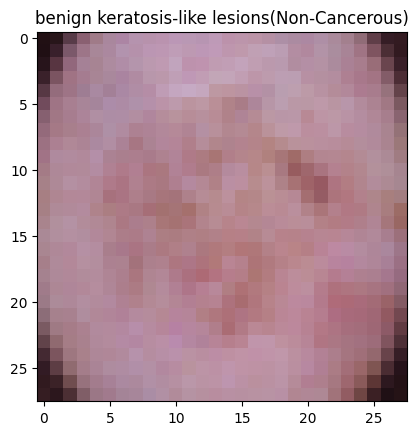

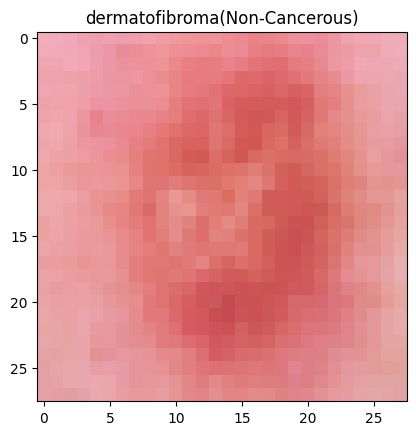

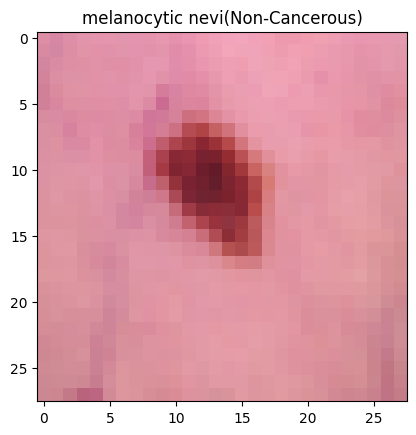

In [23]:
import matplotlib.pyplot as plt
import random
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(3):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [25]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0

In [26]:
#Checkpoint
# checkpoint_path = "/content/sample_data/Checkpoints/model-{epoch:03d}.hdf5"
# callback = tf.keras.callbacks.ModelCheckpoint('D:/Coding/Skin_Cancer_Detection/Checkpoints/model-{epoch:3d}.hdf5', monitor='val_accuracy', mode='auto', verbose=0, save_best_only=True)
# Define the path for saving checkpoints
checkpoint_path = "/content/sample_data/Checkpoints/model-{epoch:03d}.hdf5"

# Set up the ModelCheckpoint callback using checkpoint_path
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,   # Use the variable here
    monitor='val_accuracy',
    mode='auto',
    verbose=0,
    save_best_only=True
)


In [27]:
Optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
235/235 [==============================] - 10s 29ms/step - loss: 1.2344 - accuracy: 0.5581 - val_loss: 2.2864 - val_accuracy: 0.1923
Epoch 2/50
  3/235 [..............................] - ETA: 7s - loss: 0.6601 - accuracy: 0.7630

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 6s 25ms/step - loss: 0.4448 - accuracy: 0.8535 - val_loss: 1.7127 - val_accuracy: 0.3717
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2654 - accuracy: 0.9118 - val_loss: 1.5425 - val_accuracy: 0.4234
Epoch 4/50
235/235 [==============================] - 6s 26ms/step - loss: 0.2200 - accuracy: 0.9228 - val_loss: 1.2437 - val_accuracy: 0.4672
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1872 - accuracy: 0.9355 - val_loss: 0.9278 - val_accuracy: 0.6542
Epoch 6/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1458 - accuracy: 0.9495 - val_loss: 0.7723 - val_accuracy: 0.6176
Epoch 7/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1413 - accuracy: 0.9513 - val_loss: 1.0177 - val_accuracy: 0.5471
Epoch 8/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1088 - accuracy: 0.9629 - val_loss: 0.7697 - val_accuracy: 0.6230
Epoch 9/50

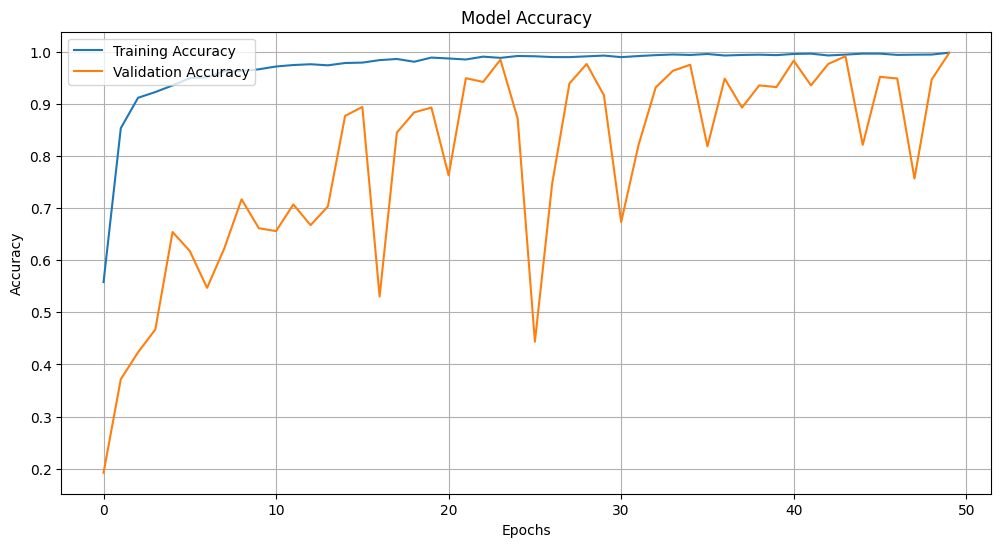

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid()
plt.show()

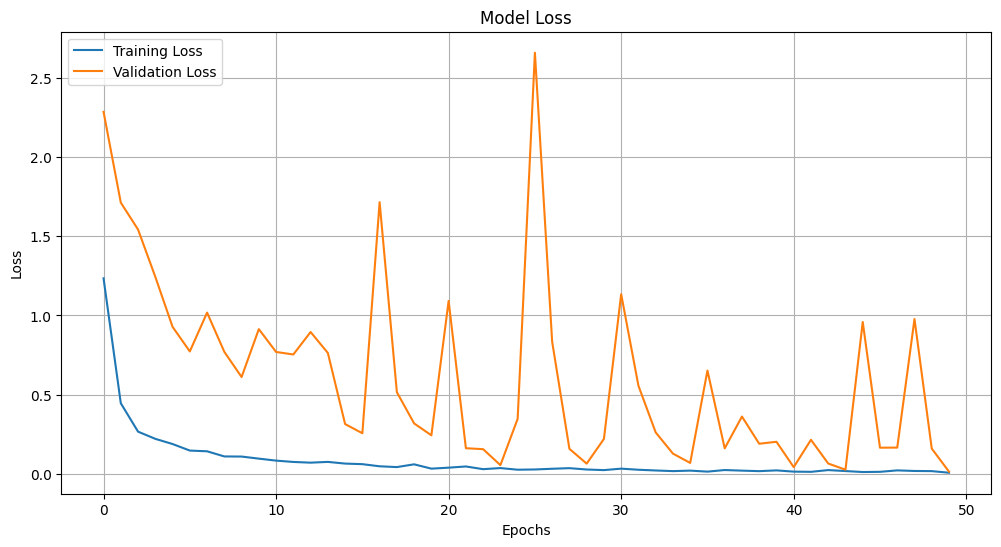

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [30]:

model.load_weights('/content/sample_data/Checkpoints/model-050.hdf5')


In [31]:
x_test = np.array(x_test).reshape(-1, 28, 28, 3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.6504 - accuracy: 0.7379 - 714ms/epoch - 11ms/step


In [33]:
import PIL
img = PIL.Image.open('/content/sample_data/testing_images/mole.jpeg')
img = img.resize((28, 28))
img = np.array(img).reshape(-1, 28, 28, 3)
result = model.predict(img)

# print(result[0])

result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])
print("Confidence: ", max(result[0])*100,"%")

1/1 [==============================] - 0s 203ms/step
melanoma(Cancer)
Confidence:  99.83214735984802 %
